#⭕ Práctica

Usaremos un dataset sobre publicidad. Este dataset consta de 200 registros, cada registro consta de las variables.

* TV: dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
* Radio: inversión publicitaria en radio
* Newspaper: inversión publicitaria en periódicos
* Sales: ventas de un solo producto en un mercado determinado (en miles de unidades).


In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/advertising.csv'
df = pd.read_csv(url,index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


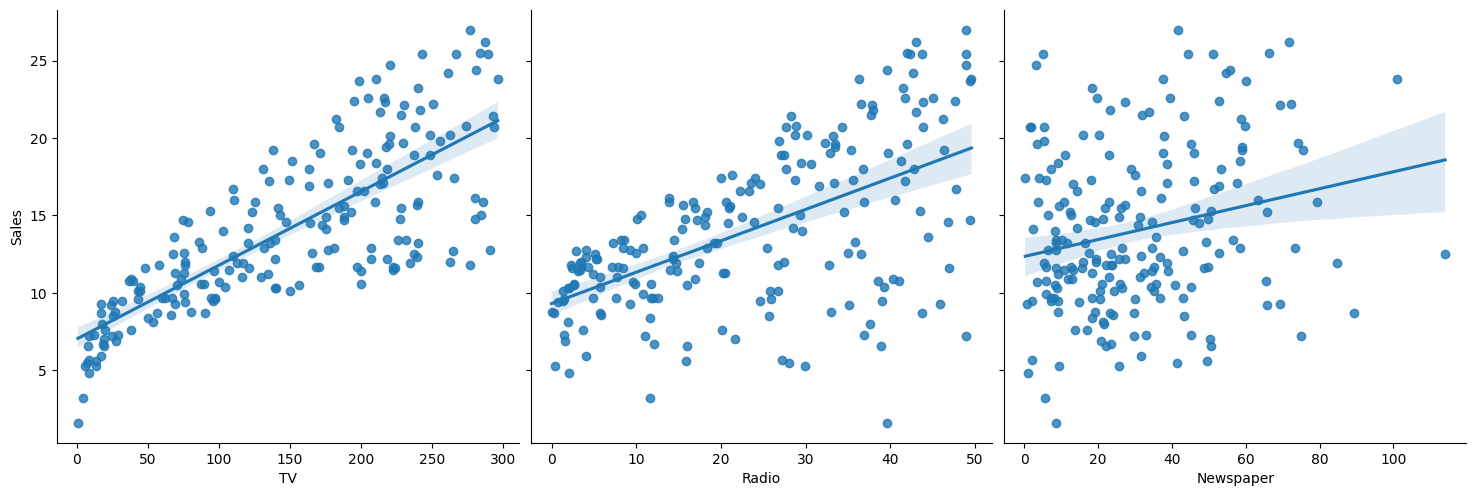

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

Objetivos:

1. Entrenar al menos dos modelo de regresión lineal (regresión lineal y uno con regularización) usando el 85% de las instancias, separar el resto para prueba. **No olvides el preprocesamiento**, **cuidado con el data leakage**.
2. Reportar las métricas de rendimiento MAE, MSE en las predicciones con el conjunto de prueba solamente.
3. Con base en la métrica de rendimiento MAE, escoge el mejor modelo de regresión lineal. Es decir, ¿cuál es el menor MAE que puedes obtener en el conjunto de prueba? Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.

Recuerdas las opciones que tienes en cada uno de los pasos:

* Preprocesamiento:
    * Escalamiento: MinMaxScaler, StandardScaler.
    * Selección de features: VarianceThreshold, SelectKBest, SequentialFeatureSelector, ...
* Algoritmo de Regresión: Regresión Lineal, Regresión Lasso, Ridge, ElasticNet.

Considera las siguientes situaciones en el preprocesamiento:

* ¿Hay valores faltantes? En caso de que sí, recuerda que tienes dos opciones: remover estas instancias o hacer imputación.
* ¿Cuál es el rango de las 3 variables? ¿tienen magnitudes muy diferentes?
* ¿Hay alguna variable que consideres que no es muy relevante?
* Realiza la(s) técnica(s) de normalización que consideres necesario: selección de features, normalización.




In [ ]:
print(f"Forma del dataframe\nInstancias (datos): {df.shape[0]}\nFeatures(variables): {df.shape[1]}")

Forma del dataframe
Instancias (datos): 200
Features(variables): 4


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#variable dependiente
y = df['Sales'].values
print(y.shape)

(200,)


In [ ]:
# quitamos a sales del dataframe
df.drop(columns='Sales',inplace=True)
df

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [ ]:
X_df = pd.get_dummies(df)
X_df.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
#tomamos las variables dependientes
X = X_df.values
print(X.shape)

(200, 3)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.85, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((170, 3), (170,))
Prueba: ((30, 3), (30,))


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#---- Esto es sólo para visualizar ----
print(X_train[:3,:5])

[[0.95544041 0.28024194 0.43431953]
 [0.43868739 0.86290323 0.33846154]
 [0.70051813 0.16935484 0.30887574]]


Entrenamiento, normal y luego con lasso (regularizada)

In [ ]:
from sklearn.linear_model import LinearRegression , Lasso

#---Es un ajuste lineal normal-----
lr = LinearRegression()
#---Con Lasso se "regulariza" (solo se descomenta y se comenta el de arriba)
#lr = Lasso(alpha=1)
lr.fit(X_train, y_train)

LinearRegression()

Veamos el coeficiente de determinación del desempeño en el **conjunto de entrenamiento**. Este es el coeficiente `R2`

In [ ]:
lr.score(X_train,y_train)

0.9056067383379365

Veamos cómo lo hace en el **conjunto de prueba**

In [ ]:
lr.score(X_test,y_test)

0.839571602133016

Predicciones

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
import numpy as np

print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
[12.6 11.7 14.6 23.8 20.8]
Valores predichos:
[13.67 14.29 14.14 15.13 14.98]


In [ ]:
y_pred_train = lr.predict(X_train)

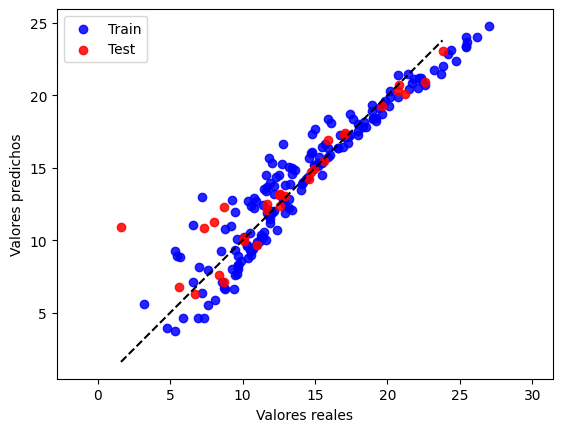

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

plt.figure(dpi=100)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.85,label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis,xaxis,'k--')  # La línea de referencia y_pred=y_real
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print(f"R2 en la prueba: {lr.score(X_test,y_test)}")

print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test)}")
 # Esta es muy interpretativa
 # hace la diferrencia del valor real con la prediccion y hace el promedio de eso


print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test)}")
print(f"MAPE en el conjunto de prueba: {mean_absolute_percentage_error(y_test,y_pred_test)}")

R2 en la prueba: 0.839571602133016
MAE en el conjunto de prueba: 1.1485384133448884
MSE en el conjunto de prueba: 4.593958082346545
MAPE en el conjunto de prueba: 0.2798520647653951


In [ ]:
print(f"R2 en el entrenamiento: {lr.score(X_train,y_train)}")

print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train)}")
print(f"MAPE en el conjunto de entrenamiento: {mean_absolute_percentage_error(y_train,y_pred_train)}")

R2 en el entrenamiento: 0.9056067383379365
MAE en el conjunto de entrenamiento: 1.247076658614582
MSE en el conjunto de entrenamiento: 2.5203803043184947
MAPE en el conjunto de entrenamiento: 0.11612326590352595


La regresion lineal es mejor que la de lasso, ya que r2 es mas cercana a 1

In [ ]:

coefs_df = pd.DataFrame(lr.coef_.reshape(1,-1),columns=X_df.columns).T
coefs_df.reset_index(inplace=True)
coefs_df.columns = ['Feature','Coeficiente']
coefs_df

,Feature,Coeficiente
0,TV,12.659470
1,Radio,9.738741
2,Newspaper,-0.136562


Entonces se tendria que invertir todo el money $ , en TV